In [405]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [406]:
data = pd.read_csv("data.csv")
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


First, I create a column *'home_game'* from the *'matchup'* column values, assuming that **LAL @** means the team plays away from home and **vs** means they play at home. After the new column is created, I delete the *'matchup'* column. Then, I drop the rows with missing values.

In [407]:
# Creating the column for the home games and games away from home.
data['home_game'] = data['matchup'].str.contains('vs').astype('int')
data.drop('matchup', axis=1, inplace=True)

In [408]:
# Dropping the rows with the missing values.
data.dropna(inplace=True)

Next, I will try to establish whether or not playing at home vs playing away from home will influence Kobe's success rate in making the shots.

In [409]:
home_win = data[['home_game', 'shot_made_flag' ]]

**Playing at Home**

In [410]:
playing_at_home = home_win.loc[home_win.home_game == 1].groupby('shot_made_flag').count().apply(lambda x: x / x.sum())
playing_at_home 

,home_game
shot_made_flag,
0.0,0.543532
1.0,0.456468


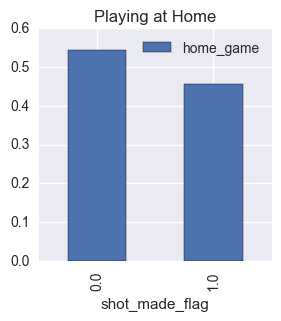

In [411]:
playing_at_home.plot(kind='bar', figsize=(3,3), title='Playing at Home')

**Playing Away**

In [412]:
not_playing_at_home = home_win.loc[home_win.home_game == 0].groupby('shot_made_flag').count().apply(lambda x: x / x.sum())
not_playing_at_home

,home_game
shot_made_flag,
0.0,0.563579
1.0,0.436421


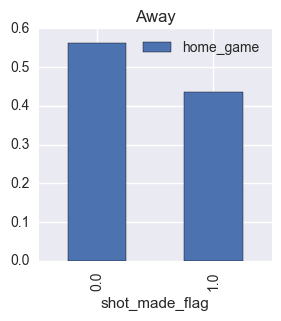

In [413]:
not_playing_at_home.plot(kind='bar', figsize=(3,3), title='Away')

Based on the available data, without knowing the missing values, we can establish that Kobe made more shots when playing at home. Kobe made **45.64%** of the shots when playing at home and made only **43.64%** of the shots when he played away from home.